<img src="materials/images/introduction-to-exposome-cover.png"/>

# Introduction to exposome data

`🕒 This module should take 30 minutes to complete.`

`✍️ This notebook is written using R.`

Human health is affected by a diverse range of factors including genetics, environmental exposures, and their complex interactions. The exposome refers to everything a person is exposed to across one's lifetime. While intensive efforts have been made to measure and understand the impact of the genome on health, our knowledge about the exposome and its impact remains remarkably limited. 

Existing evidence suggests certain types of environmental exposures (e.g. exposure to broad classes of air pollutants such as particulate matter) greatly affects our health, and are directly associated with numerous respiratory diseases, allergies, infectious diseases, and even cancer. The component of the airborne exposome is highly diverse and dynamic. One person's exposome profile is different from others', and can vary based on geographical location and season.
    
To capture the complex exposome, we used a wearable device to capture the personal environmental exposures. The device contains an air pump that continuously pumps in air, mimicking human breath. To collect the airborne exposures, we added a filter to collect biological agents from the air, and zeolite absorbents to collect chemical agents. Each sampling session takes 2-5 days. After each sampling session, we collected the filter and absorbents and send them to next generation sequencing (NGS) and mass-spectrometry (MS) for biological and chemical analysis.

In this module, you'll examine the diverse biological exposome components, and investigate **how a person's exposome varies based on geographical location**. The dataset contains samples collected at different locations, i.e. when the participant traveled to Montana and Texas, and his normal routine -- around Stanford campus. Background sample was collected in an office at Stanford Research Park. 

----

**Referenced research:**

- Jiang C, Wang X, Li X, Inlora J, Wang T, Liu Q, Snyder M. Dynamic Human Environmental Exposome Revealed by Longitudinal Personal Monitoring. Cell. 2018 Sep 20;175(1):277-291.e31. doi: 10.1016/j.cell.2018.08.060. PMID: 30241608; PMCID: PMC6472932
- Jiang, C., Zhang, X., Gao, P. et al. Decoding personal biotic and abiotic airborne exposome. Nat Protoc 16, 1129–1151 (2021). https://doi.org/10.1038/s41596-020-00451-8

**Source data:**

genusData.RData
    

<div class="alert alert-block alert-info">
<h3>⌨️ Keyboard shortcut</h3>

These common shortcut could save your time going through this notebook:
- Run the current cell: **`Enter + Shift`**.
- Add a cell above the current cell: Press **`A`**.
- Add a cell below the current cell: Press **`B`**.
- Change a code cell to markdown cell: Select the cell, and then press **`M`**.
- Delete a cell: Press **`D`** twice.

Need more help with keyboard shortcut? Press **`H`** to look it up.
</div>

----

# 1. Setup

In [1]:
# Load R packages.
library(reshape2)
library(tidyverse)
library(ade4)
library(FactoMineR)
library(factoextra)
library("gplots")

# Load data.
load("data/genusData.RData")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘FactoMineR’


The following object is masked from ‘package:ade4’:

    reconst


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




----

# 2. Overview of the diverse biological exposome

### 2.1 Get a quick understanding of the data

The biological exposome is highly diverse, it contains not only exposures from plants and animals, but also from microbes, such as fungi and bacteria. 

Examine the data table and see if you recognize some of the genera.

In [2]:
# Insert code
head(genusData)

,Filter_No,location,ownership,date.month,date.start,date.end,season,Stereum,Trametes,Botrytis,⋯,Terribacillus,Dendroctonus,Ilumatobacter,Methylomonas,Arachis,Saccharomyces,Haemonchus,Salinimicrobium,Lewinella,Spinacia
,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Filter202,Campus,P1,1,1/15/16,1/18/16,winter,52129.10,4177.315,5.866050e+03,⋯,0.0000000,0.113394,0.1058755,0.1045819,0.09894063,0.0886025,0.00000000,0.07485222,0.06815433,0.00000000
2,Filter203,Campus,P1,1,1/18/16,1/22/16,winter,337139.80,19033.011,1.092994e+02,⋯,0.0000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.08270964,0.00000000,0.00000000,0.00000000
3,Filter205,Background,Background,1,1/19/16,1/22/16,winter,620137.03,40899.107,4.659014e+00,⋯,0.0000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000
4,Filter206,Campus,P1,1,1/22/16,1/25/16,winter,404757.55,63985.294,3.412166e+04,⋯,0.0000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.06735035
5,Filter207,Campus,P1,1,1/25/16,1/28/16,winter,79655.19,39586.087,0.000000e+00,⋯,0.1157193,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000
6,Filter216,Campus,P1,2,2/19/16,2/21/16,winter,319508.27,7886.542,2.447230e+05,⋯,0.0000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000


In this dataset, each row represents data from one sample. This dataset combines metadata of the sample as well as biological data. 

The first seven columns are metadata of the samples, including:

- `Filter_No`: name of the sample
- `location`: where the sample is collected
- `ownership`: which participant the sample belongs to
- `date.month`: which month it is when the sample was collected
- `date.start` and `date.end`: start and end day of the sampling period
- `season`: during what season is the sample collected. 

Starting from Column 8, the column names are genus names, and the value are the abundance of the genus. 

4177.315 is the abundance of *Trametes*. This is a **normalized** reads count, 4177.315 of *Trametes* counts per million reads. This normalization helps **compare abundance across samples**.

In [3]:
# Take a look at the genera
colnames(genusData)[9:ncol(genusData)] # Display column names from column 9 to the last coloumn

[1] "Trametes"                   "Botrytis"                  
  [3] "Talaromyces"                "Penicillium"               
  [5] "Melampsora"                 "Preussia"                  
  [7] "Aureobasidium"              "Acinetobacter"             
  [9] "Nostoc"                     "Canis"                     
 [11] "Bacillus"                   "Aspergillus"               
 [13] "Phlebotomus"                "Trichoderma"               
 [15] "Phlebiopsis"                "Psychrobacter"             
 [17] "Betula"                     "Phanerochaete"             
 [19] "Byssochlamys"               "Pinus"                     
 [21] "Sistotremastrum"            "Schizopora"                
 [23] "Propionibacterium"          "Picea"                     
 [25] "Fibulorhizoctonia"          "Clostridium"               
 [27] "Phytophthora"               "Rhizopogon"                
 [29] "Staphylococcus"             "Phialocephala"             
 [31] "Gelatoporia"                "Cladosporium"              
 [33] "Wolfiporia"                 "Pseudogymnoascus"          
 [35] "Pseudotsuga"                "Piloderma"                 
 [37] "Paracoccus"                 "Ophiognomonia"             
 [39] "Schizophyllum"              "Shiraia"                   
 [41] "Corynebacterium"            "Lactuca"                   
 [43] "Malassezia"                 "Fomitiporia"               
 [45] "Fusarium"                   "Cronartium"                
 [47] "Rhizoctonia"                "Humulus"                   
 [49] "Chrysoporthe"               "Stagonosporopsis"          
 [51] "Phoma"                      "Cylindrobasidium"          
 [53] "Botryobasidium"             "Peniophora"                
 [55] "Planomicrobium"             "Amorphotheca"              
 [57] "Obba"                       "Tulasnella"                
 [59] "Hypsizygus"                 "Planococcus"               
 [61] "Grifola"                    "Ephydra"                   
 [63] "Tricholoma"                 "Niabella"                  
 [65] "Streptococcus"              "Amanita"                   
 [67] "Sanghuangporus"             "Beverwykella"              
 [69] "Tilletiopsis"               "Malus"                     
 [71] "Lentinus"                   "Hortaea"                   
 [73] "Sphingobacterium"           "Tolypothrix"               
 [75] "Alternaria"                 "Ganoderma"                 
 [77] "Niastella"                  "Bulleromyces"              
 [79] "Castanea"                   "Segetibacter"              
 [81] "Filobasidium"               "Enhydrobacter"             
 [83] "Pleurotus"                  "Cordyceps"                 
 [85] "Phellinus"                  "Biatriospora"              
 [87] "Zymoseptoria"               "Beauveria"                 
 [89] "Triops"                     "Cryptococcus"              
 [91] "Ricinus"                    "Postia"                    
 [93] "Lucilia"                    "Enterococcus"              
 [95] "Chryseobacterium"           "Serendipita"               
 [97] "Gallus"                     "Calothrix"                 
 [99] "Paenibacillus"              "Heterobasidion"            
[101] "Pontibacter"                "Stemphylium"               
[103] "Hymenoscyphus"              "Glarea"                    
[105] "Aegilops"                   "Oidiodendron"              
[107] "Didymobotryum"              "Rosellinia"                
[109] "Hymenobacter"               "Agaricus"                  
[111] "Ceraceosorus"               "Thermoactinomyces"         
[113] "Pedobacter"                 "Rhizomucor"                
[115] "Dichomitus"                 "Gymnopus"                  
[117] "Arthrobacter"               "Taiwanofungus"             
[119] "Diaporthe"                  "Neurospora"                
[121] "Fragaria"                   "Baudoinia"                 
[123] "Myceliophthora"             "Triticum"                  
[125] "Sporosarcina"              

Starting from Column 9, the column names are genera detected in the exposome. They're very diverse and cover all domains of life. For example, *Stereum* (fungi), *Pinus* (pine/plants), *Canis* (dogs belong in this genera/animals), and *Clostridium* (human pathogen/bacteria).

### 2.2 Visualize data with heatmap

Since exposome composition is very diverse, we use heatmap to get a sense of what the data looks like. Below is an image of the heatmap we are going to generate.

Typically, the x-axis of a heatmap is sample and y-axis is gene/microbe/characteristics of interest. The color of each intersecting tile represents the **relative expression of each characteristic**. It is useful in identifying the expression pattern of a set of samples. 

<img src="materials/images/heatmap.png"/>

The color of each tile represents the z-score, which are calculated by subtracting the mean from each cell, and then dividing the value by the standard deviation of the row.  

Z-score represents the **relative abundance** of each genus -  how common or rare the genus is in comparison to other samples in this dataset.

In [4]:
# Prepare the data.
# Create a matrix with abundances of genera as columns, and names of samples as row names.
m.genusData <- as.matrix(select(genusData, -c("Filter_No","location","ownership","date.month", "date.start", "date.end", "season")))
rownames(m.genusData) <- genusData$Filter_No 

# Select the top 30 genera for presentation.
var_genes <- apply(m.genusData, 2, mean) # Calculate mean of each genera.
select_var <- names(sort(var_genes, decreasing=TRUE))[1:30] # Select 30 genera with the most abundance.
highly_variable <- t(m.genusData)[select_var,] # Select data of these 30 genera.

In [5]:
# Set up color palette for heatmap using RColorBrewer.
# RColorBrewer package provides several palettes to visualize ordered gradient or categorical data.
install.packages("RColorBrewer")
library("RColorBrewer")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



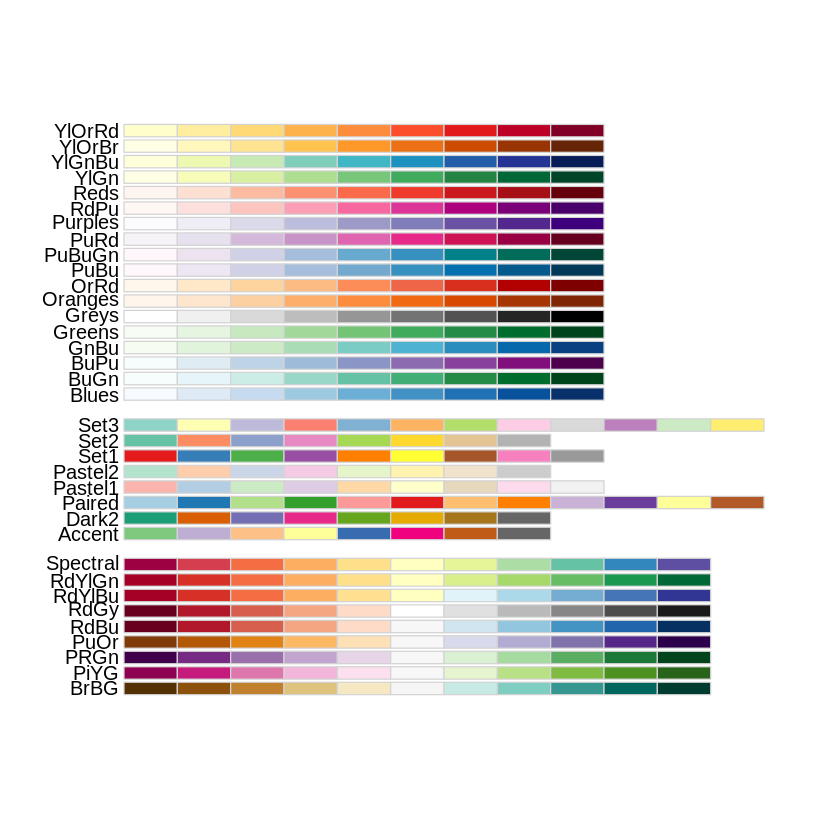

In [6]:
display.brewer.all() # See all pallettes in the package.

In [7]:
mypalette <- brewer.pal(11,"RdYlBu") # Select 11 different colors in RdYlBu (red yellow blue) pallette.
morecols <- colorRampPalette(mypalette) # Generate a new color palette with these colors.

In the code above, we first select 11 colors from the pallette `RdYlBu`. Then, we generates new colors to interpolate the original palette so that small changes can be reflected in colors as well.

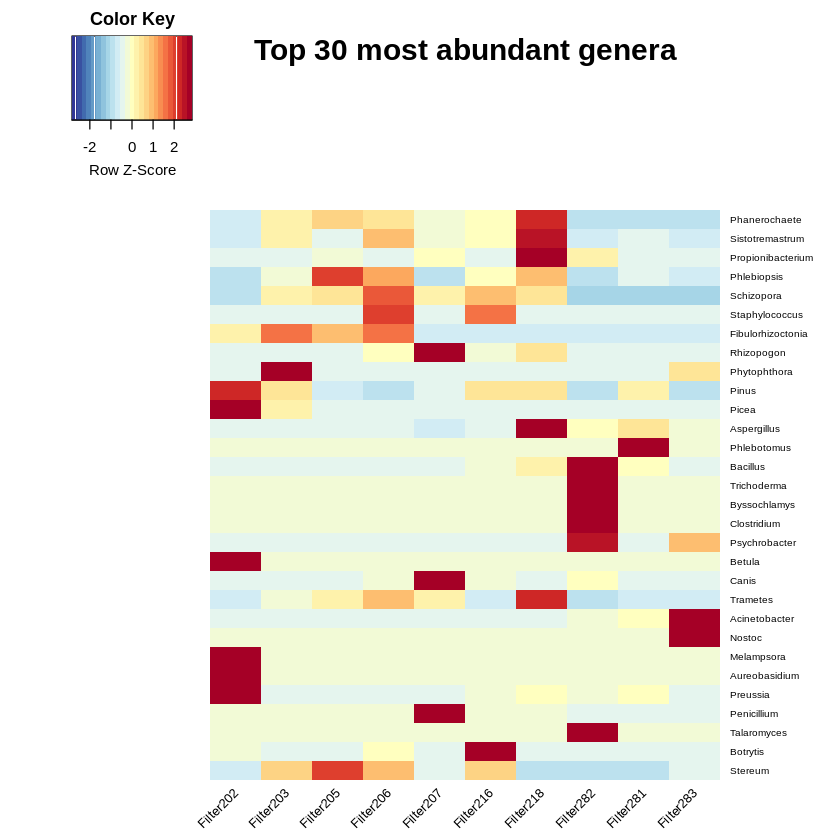

In [8]:
# Plot the heatmap.
heatmap.2(highly_variable,col=rev(morecols(25)), scale="row", cexRow = 0.6, cexCol  = 0.8, dendrogram = 'none',
          trace="none", 
          margins = c(3,6), # add margin so lables don't get cropped
          main="Top 30 most abundant genera", Colv = FALSE,
          srtCol = 45, offsetRow = 0,offsetCol = 0,
          density.info = "none",lwid = c(3,9) ,lhei= c(3,9))

**This is a recap in case you forget**:

The color of each tile represents the z-score, which are calculated by subtracting the mean from each cell, and then dividing the value by the standard deviation of the row. 

Z-score represents the **relative abundance** of each genus -  how common or rare the genus is in comparison to other samples in this dataset. 

The function `heatmap.2` calculates z-score automatically. You could learn more about in R documentation: https://www.rdocumentation.org/packages/gplots/versions/3.1.3/topics/heatmap.2

On the plot, dark red means the most abundant, and blue suggests the least abundance. 

In our samples, the exposome composition varies a lot. Some genera are specific to one sample, such as *Phlebotomus*, while some genera are found in all samples (but expression levels are different), such as *Stereum*.

----

# 3. The exposome components vary based on geographical location

**Principal Component Analysis (PCA)** is a dimensionality-reduction method in large datasets when there are a lot variations among data. PCA reduces dimensions by creating principal components (PCs). PCs describe variation and account for varied influences of the original characteristics. 

A **PCA plot** is commonly used to **show clusters of samples based on their similarity**. 

### 3.1 Identify principal components (PCs)

As the first step to create a PCA plot, we need to find out the principal components (PCs) and the amount of variation they cover. 

A **scree plot** shows the PCs and their contribution. PCs are created in the order of variation they cover. 

Class: pca dudi
Call: dudi.pca(df = m.genusData, scale = FALSE, scannf = FALSE, nf = 3)

Total inertia: 6.701e+10

Eigenvalues:
      Ax1       Ax2       Ax3       Ax4       Ax5 
4.251e+10 6.842e+09 5.627e+09 5.041e+09 3.878e+09 

Projected inertia (%):
    Ax1     Ax2     Ax3     Ax4     Ax5 
 63.445  10.211   8.398   7.524   5.787 

Cumulative projected inertia (%):
    Ax1   Ax1:2   Ax1:3   Ax1:4   Ax1:5 
  63.44   73.66   82.05   89.58   95.36 

(Only 5 dimensions (out of 9) are shown)



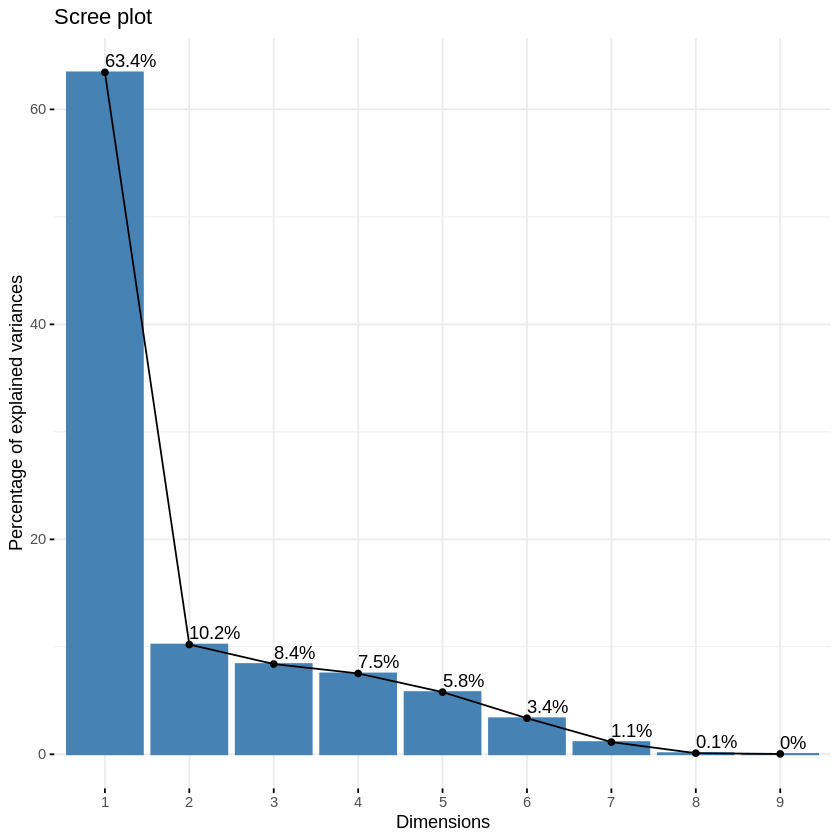

In [9]:
# Perform a PCA on the data.
pca <-  dudi.pca(m.genusData, scale=FALSE, scannf=FALSE, nf=3)

# Create a summary of PCs and their contribution.
summary(pca)

# Create a scree plot to show PCs and their contribution
fviz_screeplot(pca, addlabels = TRUE ) 

In our dataset, PC1 contributes the most, explaining 63.4% of variation among the samples, followed by PC2, explaining 10.2% and PC3 explaining 8.4%.

### 3.2 Create a Principal Component Analysis (PCA) plot

Next, let's draw a PCA plot. In this plot:
- **x-axis** is **PC1**, which explains 63.4% of variation as shown in the scree plot. 
- **y-axis** is the second most influential, **PC2**. It explains 10.2% of variation as shown in the scree plot. 

Since there are 800+ genera, it will get too crowded to visuzlize everything on one plot. We are going to choose the first 6 genera and last 6 genera in each PC, using `head()` and `tail()` in the code below:

Warning message in (function (mapping = NULL, data = NULL, stat = "identity", position = "identity", :
“Ignoring unknown parameters: `max.overlaps`”


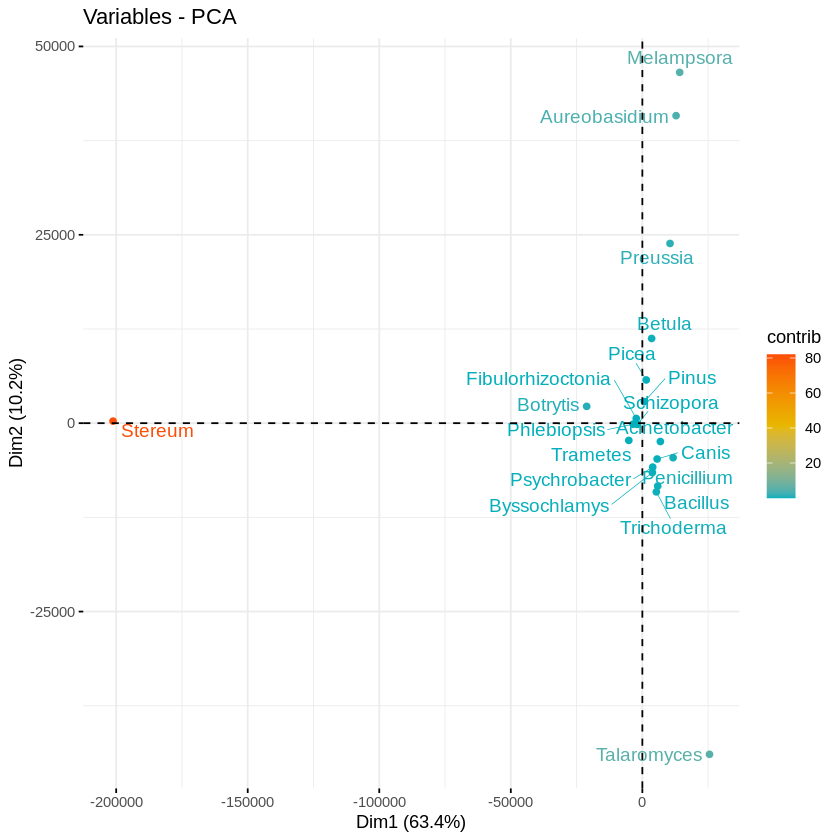

In [10]:

# Select a subset of variables (genera) for better presentation.
test.names = c(head(rownames(pca$c1)[order(pca$c1$CS1)]),tail(rownames(pca$c1)[order(pca$c1$CS1)]),
               head(rownames(pca$c1)[order(pca$c1$CS2)]),tail(rownames(pca$c1)[order(pca$c1$CS2)]))

# Create a PCA plot. 
fviz_pca_var(pca, col.var="contrib", geom=c("point","text"), select.var = list(name=test.names),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, max.overlaps = Inf) 


Here are some explanations on the code:

- `col.var="contrib"` assigns color based on the genera contribution to the pricipal components. Warmer color represents higher contribution, and colder color represents lower contribution. 

- `geom=c("point","text")` creates the genus label next to each dot.

As we can see in the plot, the colored dots represent the variables (genera) contributing to the variation:

- the x-axis is dimension 1 (i.e. PC1)
- the y-axis is dimension 2 (i.e. PC2)
- the positive and negative values on the x or y axis indicates the direction of the correlations between the variables and the PCs. The positive or negative sign doesn’t have a biological meaning, and it can be flipped. We won't get too deep on PCA analysis in this module.
- the two dark dash lines are 0s on dimension 1 and dimension 2.
- the further away a genus is from the lines of 0, the more the genus contributes to the PC.

Stereum contributes most to the variations in PC1 among these samples, and a small contribution to PC2.

<div class="alert alert-block alert-warning">
    <b>Alert:</b> It is always good to check if all the data is displayed on the plot. Usually, if some data points are missing when plotting, there is a warning message, then we can make adjustments from there. In our case, we should be expecting 24 data points, but we end up with less. There are repeated genera when we select head and tail from PC1 and PC2, so the total is not 24, but 20.
    </div>

Now, let's see how the samples vary based on geographical location. 

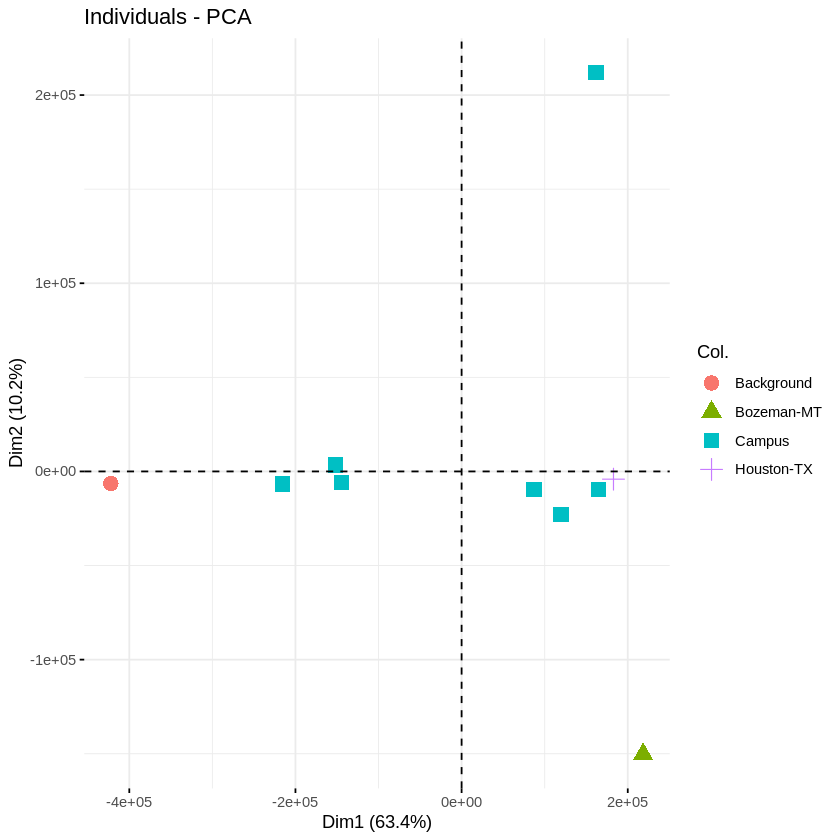

In [11]:
# Create PCA plot based on location.
fviz_pca_ind(pca, label = "none",habillage="none", pointsize=4.0, col.ind = genusData$location, mean.point = FALSE)

Instead of genera, the dots now represents each sample, and the shape represents their location. On a PCA plot, similar samples are clusterd together. In our plot, samples collected at Stanford campus are cluster together whereas samples from MT, TX and background samples are located away from each other. This shows that MT, TX and background samples are different from campus samples, and they're different from each other.

This tells us the exposome is dependent on location. 

Have you noticed the samples collected from the same person at Stanford campus have two clusters on the plot? There still are subtle compositional differences among these samples. Even though they were collected from the same person and at the same general location, they were collected on different days. Exposome is different than computer codes, it doesn’t guarantee the exact same results because the participant is unlikely to spend the same amount of time interacting with the same people with the same health conditions at the exact same location each time. This is why the field is pushing for precise, personal, and real-time measurement.

The other observation you may have is that most locations have similar contributions to PC2. PC2 is not the PC that explains the most variance (i.e. only 10.2%). The samples are not hugely different in PC2, in comparison to PC1. 

----

# Contributions & acknowledgment

- **Module Content:** Xinyue Zhang
- **Engineering:** Amit Dixit
- **UX/UI Design & Illustration:** Kexin Cha
- **Video Production:** Francesca Goncalves
- **Project Management:** Amir Bahmani, Kexin Cha

---

Copyright (c) 2022 Stanford Data Ocean (SDO)

All rights reserved.